
<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Baxtiyor! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>

# **Система персонализированных предложений для интернет магазина «В один клик»**

**Цель исследования** — разработка модели для предсказания вероятности снижения покупательской активности постоянных клиентов интернет-магазина «В один клик». В дальнейшем результаты этой модели будут использованы для сегментации покупателей, что позволит предложить им персонализированные предложения, направленные на увеличение их активности и, как следствие, на рост прибыли компании.

Для достижения поставленной цели будут выполнены следующие этапы:

- Загрузка и первичная проверка данных.
- Предобработка данных для устранения возможных ошибок и пропусков.
- Исследовательский анализ данных для выявления особенностей поведения покупателей.
- Объединение данных из разных таблиц для создания единой базы, необходимой для моделирования.
- Корреляционный анализ признаков для определения мультиколлинеарности.
- Применение различных моделей машинного обучения с целью выбора наилучшей из них.
- Оценка важности признаков и их влияние на целевой показатель с использованием метода SHAP.
- Сегментация покупателей с целью разработки персонализированных предложений для увеличения их покупательской активности.
- Выводы по результатам исследования, включая рекомендации по работе с выбранными сегментами покупателей.

In [1]:
'''
!pip cache purge -q
!pip uninstall numpy matplotlib -y -q
!pip install numpy==1.22.4 matplotlib==3.3.4  -q
'''

In [2]:
!pip install phik -q
!pip install --upgrade scikit-learn -q
!pip install shap==0.41.0 -q

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import phik

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# класс для работы с пропусками
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    LabelEncoder,
    StandardScaler, 
    MinMaxScaler,
    RobustScaler
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import shap

from sklearn.cluster import KMeans


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Собираем все импорты в верхней части, чтобы легче было ориентироваться и добавлять новые по необходимости. 


<div class="alert alert-warning">


Совет:

   

- есть рекомендации PEP-8 при написании кода, в том числе и для импортов. Если интересно можешь почитать [тут](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html). Есть что поправить 

 

## **Загрузка данных**

In [ ]:
market_file = pd.read_csv('/data/market_file.csv')
market_time = pd.read_csv('/data/market_time.csv')
market_money = pd.read_csv('/data/market_money.csv')
money = pd.read_csv('/data/money.csv', delimiter=';', decimal=',')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍decimal=','


 

In [5]:
display(market_file.head(10))
print(market_file.info())

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандартт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
6,215354,Снизилась,стандартт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2
7,215355,Снизилась,стандартт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4
8,215356,Снизилась,стандартт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3
9,215357,Снизилась,стандартт,да,3.9,5,154,0.00,Техника для красоты и здоровья,3,3,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [6]:
display(market_time.head(10))
print(market_time.info())

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдцщий_месяц,8
6,215351,текущий_месяц,13
7,215351,предыдцщий_месяц,11
8,215352,текущий_месяц,11
9,215352,предыдцщий_месяц,8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB
None


In [7]:
display(market_money.head(10))
print(market_money.info())

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
8,215350,предыдущий_месяц,5457.5
9,215351,текущий_месяц,6610.4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB
None


In [8]:
display(money.head(10))
print(money.info())

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
5,215353,3.95
6,215354,3.62
7,215355,5.26
8,215356,4.93
9,215357,4.66


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB
None


Заказчик подготовил 4 файла с данными для анализа. По общей информации таблиц видно нет пропусков. Но нужно привести наименование столюцов в единый формат для удобства работы в коде. Также, в таблице 'money' у столбца 'Прибыль' неверный тип данных.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

 
 
	
- предварительный обзор данных сделан

  

- план дальнейших действий составлен
    
    
  


<div class="alert alert-warning">
 

Совет 🤔:
    



 
    
-  Можно было сразу корректно прочитать данные в файле money, добавив аргумент decimal = ',' 




## **Предобработка данных**

#### **Обработка названия столбцов**

In [9]:
# Переименование столбцов
market_file = market_file.rename(columns={
    'Покупательская активность': 'activity',
    'Тип сервиса': 'service_type',
    'Разрешить сообщать': 'allow_reporting',
    'Маркет_актив_6_мес': 'marketing_communications_6_m',
    'Маркет_актив_тек_мес': 'marketing_communications_current',
    'Длительность': 'duration',
    'Акционные_покупки': 'promo_purchases',
    'Популярная_категория': 'popular_category',
    'Средний_просмотр_категорий_за_визит': 'average_category_views_per_visit',
    'Неоплаченные_продукты_штук_квартал': 'unpaid_products_pieces_quarter',
    'Ошибка_сервиса': 'service_error',
    'Страниц_за_визит': 'pages_per_visit'
})

market_time = market_time.rename(columns={
    'Период': 'period',
    'минут': 'minute'
})

market_money = market_money.rename(columns={
    'Период': 'period',
    'Выручка': 'revenue'  
})

money = money.rename(columns={'Прибыль': 'profit'})

# Проверка новых названий столбцов
print(market_file.info())
print('------------------------------------------------------')
print(market_time.info())
print('------------------------------------------------------')
print(market_money.info())
print('------------------------------------------------------')
print(money.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                1300 non-null   int64  
 1   activity                          1300 non-null   object 
 2   service_type                      1300 non-null   object 
 3   allow_reporting                   1300 non-null   object 
 4   marketing_communications_6_m      1300 non-null   float64
 5   marketing_communications_current  1300 non-null   int64  
 6   duration                          1300 non-null   int64  
 7   promo_purchases                   1300 non-null   float64
 8   popular_category                  1300 non-null   object 
 9   average_category_views_per_visit  1300 non-null   int64  
 10  unpaid_products_pieces_quarter    1300 non-null   int64  
 11  service_error                     1300 non-null   int64  
 12  pages_

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:




- помнишь о стилистике. Молодец что используешь rename,  чтобы не думать о порядке. 

 
 

#### **Обработка дубликатов**

In [10]:
# Проверка дубликатов
print('market_file:', market_file.duplicated().sum())
print('market_time:', market_time.duplicated().sum())
print('market_money:', market_money.duplicated().sum())
print('money:', money.duplicated().sum())

market_file: 0
market_time: 0
market_money: 0
money: 0


В файлах нет дубликатов.

## **Исследовательский анализ данных**

In [11]:
# Функция для вывода графиков числовых признаков
def graph_numeric(df, col, bins=30):
    # Конфигурация для отображения графиков
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 4))

    # Гистограмма
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=bins, kde=True)
    plt.title(f'Histogram of {col}')
    
    # Ящик с усами
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    
    plt.show()
    print(df[col].describe())


# Функция дял вывода графиков категориальных признаков
def graph_cat(df, col):
    # Конфигурация для отображения графиков
    sns.set(style="whitegrid")
    plt.figure(figsize=(5, 5))

    # Построение диаграммы
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ylabel='')
    plt.title(f'Pie Chart of {col}')
    plt.show()

    print(df[col].describe())

#### **Количественные признаки**

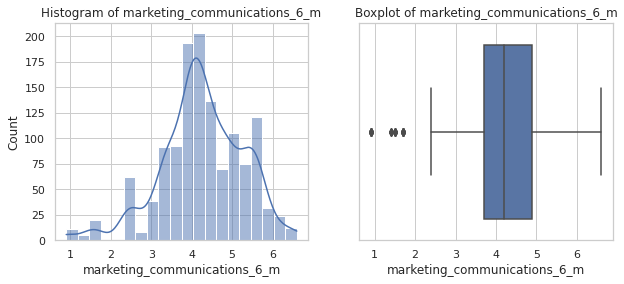

count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: marketing_communications_6_m, dtype: float64


In [12]:
graph_numeric(market_file, 'marketing_communications_6_m', bins=20)

- центральная тенденция: Среднее значение и медиана довольно близки друг к другу (4.25 и 4.2), что свидетельствует о нормальном распределении с небольшим правым хвостом.
- выбросы: Есть несколько значений, которые сильно отклоняются от остальных и могут потребовать внимания. Эти значения могут указывать на аномальных клиентов или ошибки в данных.
- группировка клиентов: Клиентов можно условно разделить на три группы: низкоактивные (1-3), среднеактивные (3.7-4.9), и высокоактивные (5-6.6) в зависимости от числа маркетинговых коммуникаций за последние 6 месяцев.

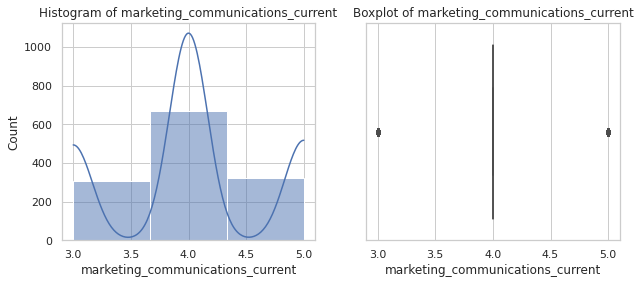

count    1300.000000
mean        4.011538
std         0.696868
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: marketing_communications_current, dtype: float64


In [13]:
graph_numeric(market_file, 'marketing_communications_current', bins=3)

- центральная тенденция: Среднее значение и медиана довольно близки друг к другу (4.01 и 4), что свидетельствует о нормальном распределении вокруг 4.
- группировка клиентов: Клиентов можно условно разделить на три группы: низкоактивные (3), среднеактивные (4), и высокоактивные (5) в зависимости от числа маркетинговых коммуникаций.

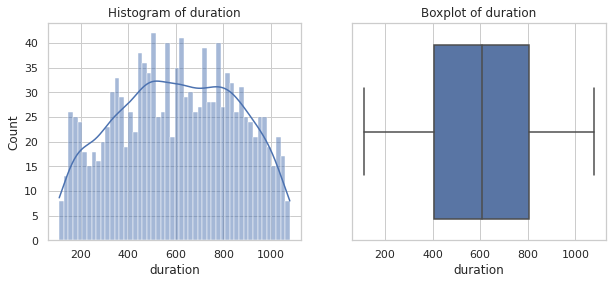

count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: duration, dtype: float64


In [14]:
graph_numeric(market_file, 'duration', bins=50)

Данные по длительности (duration) имеют симметричное распределение, с большинством значений сосредоточенных вокруг центральной точки, что может указывать на типичное время, сколько дней прошло с момента регистрации покупателя.

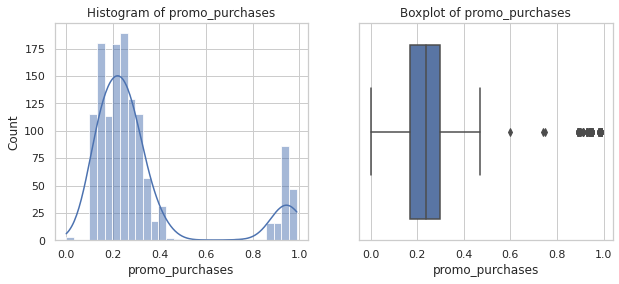

count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: promo_purchases, dtype: float64


In [15]:
graph_numeric(market_file, 'promo_purchases')

- двугорбое распределение: Данные показывают наличие двух значимых групп пользователей: одна группа совершает небольшую долю своих покупок по промоакциям, а другая группа активно использует промоакции, совершая почти все свои покупки по ним.
- медиана: Основная масса данных сконцентрирована вокруг медианного значения (0,24), что соответствует типичному поведению среднего пользователя.
- выбросы: Наличие выбросов в правой части распределения указывает на меньшую, но значимую группу пользователей, сильно ориентированных на промоакции. Это может свидетельствовать о том, что программа промоакций успешно стимулирует значительное число пользователей на участие в акциях, однако есть также пользователи, которые практически не реагируют на промоакции.

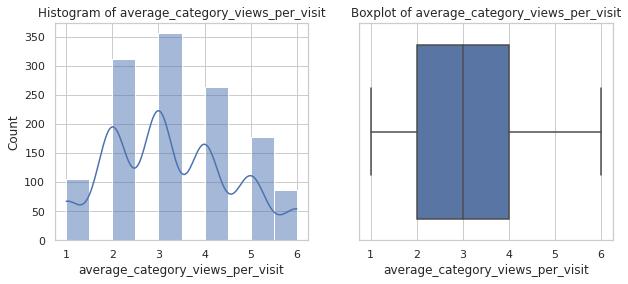

count    1300.00000
mean        3.27000
std         1.35535
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         6.00000
Name: average_category_views_per_visit, dtype: float64


In [16]:
graph_numeric(market_file, 'average_category_views_per_visit', bins=10)

- распределение показывает, что существует несколько разных типов поведения пользователей. Некоторые из них предпочитают ограниченный просмотр категорий (1–2 за визит), тогда как другие могут просматривать больше категорий (5 и выше).
- медиана: Значение медианы (3) указывает на то, что среднестатистический пользователь просматривает три категории за один визит.

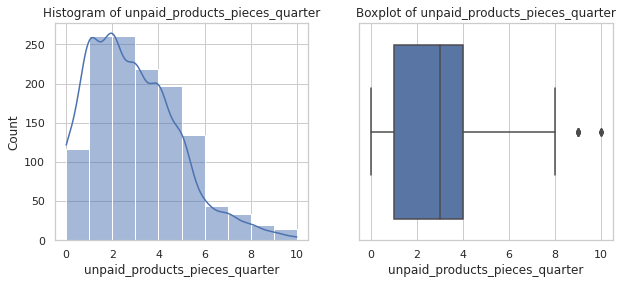

count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: unpaid_products_pieces_quarter, dtype: float64


In [17]:
graph_numeric(market_file, 'unpaid_products_pieces_quarter', bins=10)

Большая часть пользователей имеет 1–4 неоплаченных товара за квартал, что можно считать нормой. Правосторонняя асимметрия указывает на то, что у небольшой части пользователей есть тенденция к накоплению большого числа неоплаченных товаров (5 и более), что может свидетельствовать о проблемах с оплатой или активных пользователях, которые не завершили покупки. Значения с 8–10 неоплаченными товарами являются редкими и могут быть интересны для анализа поведения тех пользователей, которые имеют тенденцию к большому числу неоплаченных товаров.

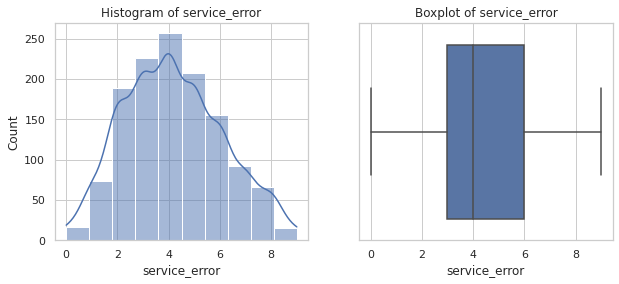

count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: service_error, dtype: float64


In [18]:
graph_numeric(market_file, 'service_error', bins=10)

Большая часть пользователей сталкивается с 3–6 ошибками сервиса, что может быть нормальной или ожидаемой частотой ошибок. Нормальное распределение указывает на то, что ошибки распределены равномерно по пользователям, с наибольшей частотой на уровне 4. Низкие значения ошибок (0–2) и высокие значения (8–9) встречаются реже, что может означать, что в основном пользователи сталкиваются с умеренным количеством ошибок, а крайние значения могут быть редкими случаями.

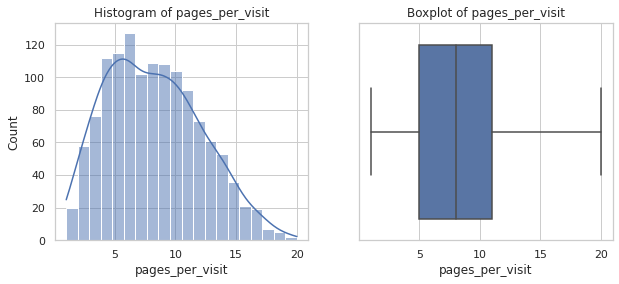

count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: pages_per_visit, dtype: float64


In [19]:
graph_numeric(market_file, 'pages_per_visit', bins=20)

Типичный пользователь просматривает от 5 до 11 страниц за один визит, что говорит о среднем уровне вовлеченности. Пользователи с высоким числом просмотров (выше 15 страниц) встречаются реже и могут быть особо заинтересованными клиентами или нуждаться в большем количестве информации. Асимметричное распределение указывает на наличие группы активных пользователей, которые потребляют больше контента, хотя большинство пользователей ограничивается меньшим числом просмотров.

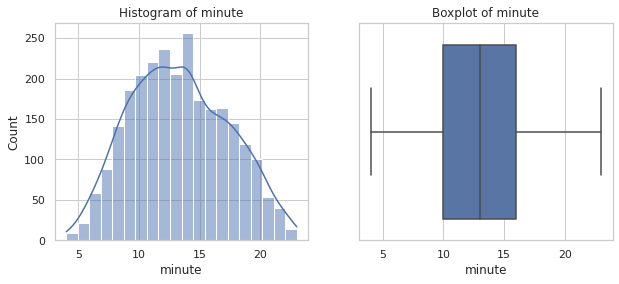

count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: minute, dtype: float64


In [20]:
graph_numeric(market_time, 'minute', bins=20)

Типичный пользователь тратит от 10 до 16 минут, что соответствует среднему уровню активности. Симметричное распределение указывает на сбалансированную активность, без значительного отклонения в сторону более коротких или более длинных сессий. Максимальные значения времени выше 20 минут встречаются реже и могут свидетельствовать о пользователях с повышенным интересом или необходимостью длительного пребывания на сайте.

In [21]:
# Создаем сводную таблицу с количеством уникальных id и суммой revenue по каждому периоду
pivot_table = market_money.pivot_table(
    index='period',
    values=['id', 'revenue'],
    aggfunc={'id': 'nunique', 'revenue': 'sum'}
).reset_index()

# Переименуем столбцы для лучшего восприятия
pivot_table.columns = ['Период', 'Кол-во уникальных ID', 'Сумма revenue']

# Вывод сводной таблицы
print(pivot_table)

                Период  Кол-во уникальных ID  Сумма revenue
0     предыдущий_месяц                  1300      6417996.5
1  препредыдущий_месяц                  1300      6272769.0
2        текущий_месяц                  1300      6909449.1


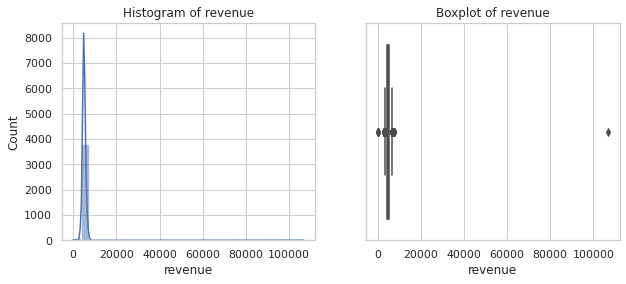

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: revenue, dtype: float64


In [22]:
graph_numeric(market_money, 'revenue')

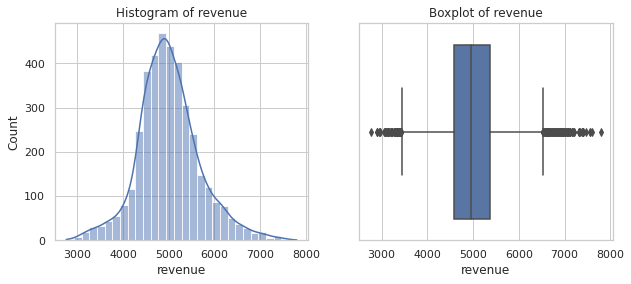

count    3888.000000
mean     5007.255658
std       679.193461
min      2758.700000
25%      4591.950000
50%      4959.000000
75%      5363.000000
max      7799.400000
Name: revenue, dtype: float64


In [23]:
# Удаление выброса
id_to_remove = market_money[(market_money['revenue'] > 10290.5) | (market_money['revenue'] <= 0)]['id']
market_money = market_money[~market_money['id'].isin(id_to_remove)]

graph_numeric(market_money, 'revenue')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍


 

Средняя выручка от пользователей варьируется в пределах от 4592 до 5363 единиц. График ящик усами показывает анамалию - покупателя с высокой выручкой. После удаления анамальных значений, остаются выбросы, основная масса которых хорошо укладывается в нормальное распределение. Нормальное распределение говорит о сбалансированности доходов без сильных асимметрий, что может свидетельствовать о стабильной аудитории с регулярной покупательной способностью.

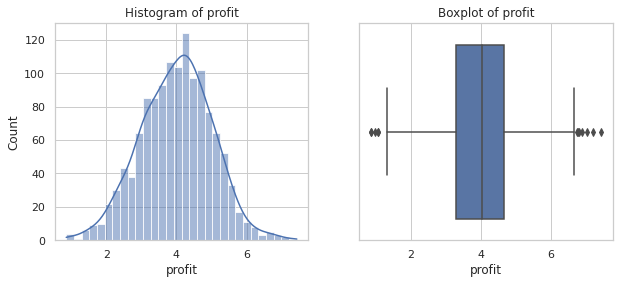

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: profit, dtype: float64


In [24]:
graph_numeric(money, 'profit')

Средняя прибыль колеблется вокруг 4 единиц, с небольшими отклонениями. Выбросы имеются, но основная часть данных распределена относительно нормально. Прибыль распределена симметрично, что указывает на отсутствие значительных колебаний в доходности.

#### **Категориальные признаки**

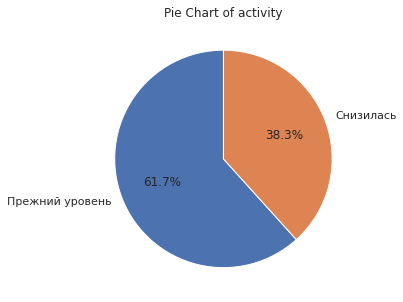

count                1300
unique                  2
top       Прежний уровень
freq                  802
Name: activity, dtype: object


In [25]:
graph_cat(market_file, 'activity')

Покупательская активность расспределена на два класса: «снизилась» или «прежний уровень». График показывает, что у более 60% покупателей осталься прежний уровень активности. Почти у 40% снизилась активность, это достаточно высокий уровень.

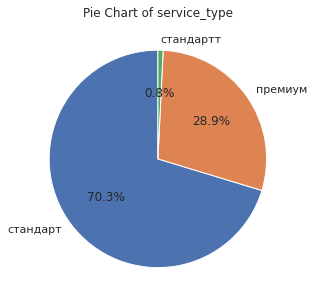

count         1300
unique           3
top       стандарт
freq           914
Name: service_type, dtype: object


In [26]:
graph_cat(market_file, 'service_type')

In [27]:
# Исправление признаков
market_file['service_type'] = market_file['service_type'].replace('стандартт', 'стандарт')

    
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех:


    
- Здорово что обращено внимание   скрытые дубликаты    
 

<div class="alert alert-warning">

Совет: 

 
- можно еще поискать опечатки (кстати повлияют ли они на работу модели?)

   

Тип сервиса разбит на 2 класса: «премиум» и «стандарт». Большинство покупателей имеют тип стандарт - более 70%.

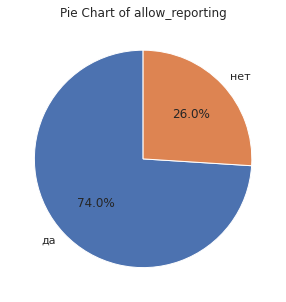

count     1300
unique       2
top         да
freq       962
Name: allow_reporting, dtype: object


In [28]:
graph_cat(market_file, 'allow_reporting')

Большинство пользователей - 74% дали согласие на получение предложений о дополнительном товаре.

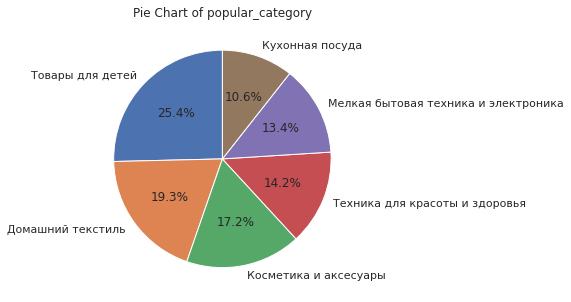

count                 1300
unique                   6
top       Товары для детей
freq                   330
Name: popular_category, dtype: object


In [29]:
graph_cat(market_file, 'popular_category')

Товары для детей являются самой популярной категорией.
Категории Домашний текстиль и Косметика и аксессуары также занимают значительную долю в выборке.
Кухонная посуда является наименее популярной категорией среди представленных.

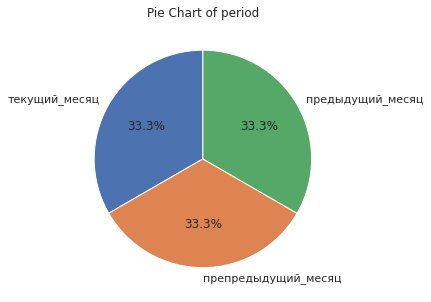

count              3888
unique                3
top       текущий_месяц
freq               1296
Name: period, dtype: object


In [30]:
graph_cat(market_money, 'period')

Периоды в котором зафиксирована выручка поровну разбита на 3 класса: текущий месяц, предыдущий месяц и препредыдущий месяц.

#### **Клиенты с покупательской активностью не менее трёх месяцев**

По техническому заданию нужно изучать активных пользователей, которые совершали покупки последние 3 месяца. Выведим список покупателей, по которым нет выручки по последним 3 месяцам.

In [31]:
# Фильтруем данные, где revenue больше 0
active_users = market_money[market_money['revenue'] > 0]

# Для каждого id проверим, есть ли запись в каждом из трёх периодов
active_3_months = active_users.groupby('id')['period'].nunique()

# Отберем список id, где уникальных периодов = 3 и не равно 3 (текущий, предыдущий и препредыдущий месяц)
not_active_ids = active_3_months[active_3_months != 3].index
active_ids = active_3_months[active_3_months == 3].index
print(not_active_ids)

Int64Index([], dtype='int64', name='id')


Как видим, в данных нет таковых. Мы удалили таких пользователей, когда удаляли аномальные значения. Также мы сохранили список активных пользователей в переменную active_ids

В исследовательском анализе:
- мы изучили все признаки в таблицах
- удалили аномальные значения в таблице market_money у признака 'revenue'
- исправили ошибочное наименование класса в таблице market_file у признака 'service_type'
- получили список активных пользователей, которые что-либо покупали последние 3 месяца.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

 
	
	
- Правильно что продолжаешь практику с прошлого проекта и строишь 2 типа графиков для количественных признаков 
    

- Хорошо что используешь subplots, seaborn,   стоит стремиться к красивому и компактному оформлению графиков


- Для  разных типов данных используешь  соответствующие графики
    

- Написана функция для графика - полезно, особенно если много однотипного кода 
 

- Есть выводы по увиденному
  

<div class="alert alert-warning">


Совет 🤔:

   
- можно пойти дальше  и для графиков распределений сделать разбивку по таргету. Так мы можем получить дополнительную информацию для лучшего понимания наших данные, может что-то пригодится для раздела сегментации. Если использовать seaborn, это можно сделать с помощью аргумента [hue](https://www.statology.org/seaborn-histogram-hue/). В результате мы получим наложенные (в разбивки по таргету) 2 гистограммы (boxplot тоже неплохо добавить) для каждого количественного признака. И о категориальных незабываем. Будет красиво и информативно.
  

    
- для гистограмм по выручке и минутам, стоит предварительно сделать группировку по "период" (у нас будет 3 графика по выручке и 2 по минутам), это разумно, ведь именно в таком виде мы используем их      

## **Объединение таблиц**

In [32]:
# Создаем сводную таблицу для выручки с отдельными столбцами для каждого периода
revenue_pivot = market_money.pivot_table(values='revenue', index='id', columns='period', aggfunc='sum')
revenue_pivot.columns = ['revenue_current_month', 'revenue_last_month', 'revenue_prelast_month']

# Создаем сводную таблицу для времени на сайте с отдельными столбцами для каждого периода
time_pivot = market_time.pivot_table(values='minute', index='id', columns='period', aggfunc='sum')
time_pivot.columns = ['time_current_month', 'time_last_month']

# Объединяем данные с исходной таблицей market_file
final_data = market_file.merge(revenue_pivot, on='id', how='left') \
                        .merge(time_pivot, on='id', how='left')

# Оставляем только тех пользователей, которые покупали все 3 последние месяца
data = final_data[final_data['id'].isin(active_ids)]
data = data.set_index('id')

# Просмотр первых строк итоговой таблицы
display(data.head(10))
print(data.info())

,activity,service_type,allow_reporting,marketing_communications_6_m,marketing_communications_current,duration,promo_purchases,popular_category,average_category_views_per_visit,unpaid_products_pieces_quarter,service_error,pages_per_visit,revenue_current_month,revenue_last_month,revenue_prelast_month,time_current_month,time_last_month
id,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10
215354,Снизилась,стандарт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2,5685.0,4503.0,5869.6,11,12
215355,Снизилась,стандарт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4,3263.0,4749.0,3772.6,12,10
215356,Снизилась,стандарт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3,4146.5,4433.0,4566.4,6,7
215358,Снизилась,стандарт,да,4.7,4,450,0.13,Домашний текстиль,4,2,6,4,3488.0,4727.0,4209.5,14,10


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 215349 to 216647
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   activity                          1296 non-null   object 
 1   service_type                      1296 non-null   object 
 2   allow_reporting                   1296 non-null   object 
 3   marketing_communications_6_m      1296 non-null   float64
 4   marketing_communications_current  1296 non-null   int64  
 5   duration                          1296 non-null   int64  
 6   promo_purchases                   1296 non-null   float64
 7   popular_category                  1296 non-null   object 
 8   average_category_views_per_visit  1296 non-null   int64  
 9   unpaid_products_pieces_quarter    1296 non-null   int64  
 10  service_error                     1296 non-null   int64  
 11  pages_per_visit                   1296 non-null   int64  
 12 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



- данные для моделирования подготовлены верно


 

- правильно что использован pivot_table,  наверное самый оптимальный метод для  задачи что то повернуть

 

 

## **Корреляционный анализ**

Проведите корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования. Сделайте выводы о мультиколлинеарности и при необходимости устраните её.

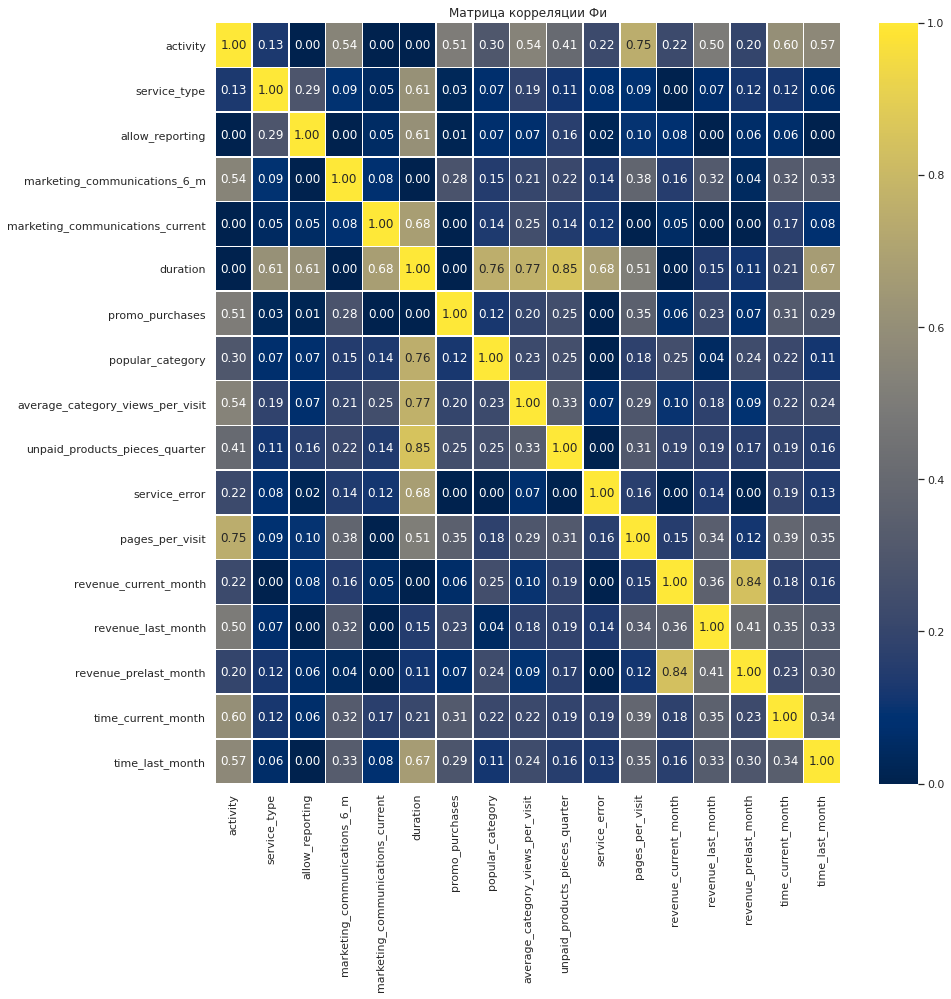

In [33]:
interval_cols = ['marketing_communications_6_m',
                 'promo_purchases', 
                 'revenue_current_month', 
                 'revenue_last_month', 
                 'revenue_prelast_month']

corr_matrix = data.phik_matrix(interval_cols=interval_cols)

plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidth=.5, cmap='cividis')
plt.title('Матрица корреляции Фи')
plt.show()

На основе представленной таблицы корреляций можно провести следующие выводы о мультиколлинеарности и предложить пути её устранения.

**Высокая корреляция (выше 0.7):**
- activity сильно коррелирует с pages_per_visit (0.75) и time_current_month (0.60). Это говорит о том, что активность пользователя тесно связана с количеством страниц, которые он просматривает, и временем, проведённым на сайте в текущем месяце
- revenue_current_month и revenue_prelast_month имеют очень высокую корреляцию (0.84). Это может указывать на тенденцию, что если пользователь активно тратил деньги в предыдущем месяце, он, вероятно, также активен в текущем
- time_current_month и time_last_month также имеют высокую корреляцию (0.41). Это может быть связано с тем, что пользователи, которые активно используют сервис в текущем месяце, вероятно, делали это и в прошлом месяце.

**Возможная мультиколлинеарность:**
Признаки с корреляцией выше 0.7 могут вызвать мультиколлинеарность, что создаст проблемы для моделей, таких как линейная регрессия или логистическая регрессия. Примеры таких признаков:
- revenue_current_month и revenue_prelast_month
- activity и pages_per_visit
- activity и time_current_month.

**Рекомендации по устранению мультиколлинеарности:**
- Регуляризация (Lasso или Ridge): Если требуется использовать модели линейной или логистической регрессии, можно применять регуляризацию для минимизации влияния мультиколлинеарности
- Проверка на мультиколлинеарность с помощью Фактора инфляции дисперсии (VIF).

 
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



- здорово что использован phik, это позволяет тебе не обращать внимание на ограничения Пирсона/Спирмена 
 
 
- при работе с не нормально распределенными признаками был подсчитан Спирмен, а не Пирсон


- проведен анализ на мультиколлинеарность между переменными (а для каких моделей мультиколлинеарность может быть проблемой и всегда ли?). Можно для разнообразия  сделать проверку на её наличие с помощью VIF

 

<div class="alert alert-warning">


Совет: 

 
 
- используя phik_matrix  лучше вручную указать столбцы с количественными признаками через  [interval_cols](https://dzen.ru/a/ZEtcuc4K2RX_Jstr)   
  
   
    
- к этому времени я бы уже убрал id из анализа (сделав из него индекс). И не надо было создавать новую выборку дропая его

    
 

- для того чтобы чтобы лучше понять наши данные, предлагаю построить 2 матрицы коррелции, одну на данных покупателей со снижающей активностью, другую для сохраняющих активность, и посмотреть есть ли отличия. Даже если сильных отличий не будет, это тоже результат
  



<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет 🤔:






В прошлом проекте мы активно использовали scatter_plot для уточнения характера связи между признаками и удоем, и на основе увиденного сделали некоторые преобразования, помогающие преодолеть ограничения линейной модели. В этом проекте мы используем нелинейные модели для которых это не проблема, и таргет у нас не количественный а категориальный. Тем не менее и в этом проекте можно построить scatter_plot между количественными признаками, а таргет использовать  в качестве фильтра. Напомню что проще всего это реализовать с помощью [sns.PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html). Это не пригодится нам для улучшения метрики, но возможно мы увидим что то полезное для сегментации или лучшего понимания наших данных. 


- Можно c помощью scatter_plot сконцентрироваться на связи между выручка текущая - выручка за прошлый. Там явная линейная зависимость, причем как будто бы множество точек тяготеют к двум прямым. Можно поискать факторы которые описывает эти два разных множества. Можно к выручке за прошлый месяц добавить выручку за позапрошлый месяц (или отнять) и тогда в каких то группировках по категориальным признакам будет очень четкая линейная зависимость достигающая по r2 за 0.9. Из этого можно сделать вывод что  в определенных группировках, зависимость между выручками за разные периоды практически дерерминирована (очень высокий показатель r2), то есть из выручки за прошлый (и с учетом позапрошлого месяца) мы можем точно спрогнозировать расходы клиента за текущий месяц. О чем это может говорить? 


- Можно посмотреть scatter_plot между id и акционными покупками. Можно кое что интересное увидеть и дать этому обьяснение


## **Использование пайплайнов**

In [34]:
ohe_columns = [ 
    'popular_category'
]
ord_columns = [ 
    'service_type', 
    'allow_reporting'    
]
num_columns = [
    'marketing_communications_6_m',
    'marketing_communications_current',
    'duration', 'promo_purchases',
    'average_category_views_per_visit',
    'unpaid_products_pieces_quarter',
    'service_error',
    'pages_per_visit',
    'revenue_current_month',
    'revenue_last_month',
    'revenue_prelast_month',
    'time_current_month',
    'time_last_month'
]

RANDOM_STATE = 42
TEST_SIZE = 0.25





<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:


Тут всё логично

  

<div class="alert alert-warning">



Совет 🤔:


	
- константы лучше оставлять сразу после импортов библиотек, как их легче будет контролировать и изменять при надобности 
    
    
    RANDOM_STATE = 42
    TEST_SIZE = 0.25

 
    
    
В будущем при предобработке данных можешь учитывать следующие моменты:

    
- если у категориального признака большое количество уникальных значений, применение One-Hot Encoding может привести к большому количеству новых признаков, это усложнит работу моделей
    
- у catboost и lighgbm есть собственные инструменты работы с категориальными данными, нужно только указать какие столбца содержат категориальные данные
    
- при работе с количественными признаками для линейных и метрических (модели в которых измеряется расстояние) моделей  обязательно делаем Scaler, в отличие от моделей на основе деревьев решений, для них Scaler не нужен
        

Можешь подумать над вопросом почему для линейных моделей некорректное использование OrdinalEncoder может вызвать больше проблем чем для случайного леса  или других моделей в основе которых лежат деревья решений   



    

In [35]:
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['activity'], axis=1),
    data['activity'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = data['activity']
)

In [36]:
# Кодируем целевой признак
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Проверяем, что класс "снизилась" закодирован как 1, а "прежний уровень" как 0
if label_encoder.classes_[0] == "снизилась":
    y_train = 1 - y_train_encoded
    y_test = 1 - y_test_encoded

print(f"Классы после кодирования: {label_encoder.classes_}")

Классы после кодирования: ['Прежний уровень' 'Снизилась']


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍


Также можно было ультимативно указать чтобы снизилась кодировалось единицей, с помощью .classes_ 



<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет:
 
	

- использован LabelEncoder,  но не хватает проверки, что у нас закодировал с нулём а что единицей. Вообще, единицей кодируются наш положительный класс (Судя по постановке задачи - это "снизилась"). Поэтому будет лучше если ты ультимативна укажешь что "снизилась" это единица 

 

In [37]:
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
    )

In [38]:
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум'],
                    ['нет', 'да']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [39]:
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [40]:
param_grid = [
    # Параметры DecisionTreeClassifier
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()],
        'preprocessor__ohe': [OneHotEncoder()],
        'preprocessor__ord': [OrdinalEncoder()]
    },
    # Параметры KNeighborsClassifier
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()],
        'preprocessor__ohe': [OneHotEncoder()],
        'preprocessor__ord': [OrdinalEncoder()]
    },
    # Параметры LogisticRegression
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')],
        'models__C': range(1, 7),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()],
        'preprocessor__ohe': [OneHotEncoder()],
        'preprocessor__ord': [OrdinalEncoder()]
    },
    # Параметры LogisticRegression
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__C': range(1, 7),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()],
        'preprocessor__ohe': [OneHotEncoder()],
        'preprocessor__ord': [OrdinalEncoder()]
    }
]

grid = GridSearchCV(
    pipe_final, 
    param_grid=param_grid, 
    cv=5,
    scoring='roc_auc', 
    n_jobs=-1
)

In [41]:
grid.fit(X_train, y_train)
print('Лучшая модель и её параметры:\n\n', grid.best_estimator_)
print ('Метрика лучшей модели на кросс-валидации:', round(grid.best_score_, 3))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe', OneHotEncoder(),
                                                  ['popular_category']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['service_type',
                                                   'allow_reporting']),
                                                 ('num', RobustScaler(),
                                                  ['marketing_communications_6_m',
                                                   'marketing_communications_current',
                                                   'duration',
                                                   'promo_purchases',
                                                   'average_category_views_per_visit',
                                                   

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:


- pipelines + ColumnTransformer + подбор гиперпараметров 
- 'passthrough' не забыт
- drop='first’ указан
- 2 способа масштабирование и кодирования


 

<div class="alert alert-warning">


Совет 🤔:

 

- бывает полезно замерить время исполнения кода в ячейке, это можно сделать с помощью магической функции %%time или библиотеки time

 
  
 
- для расширения кругозора: GridSearch/RandomizedSearch это классика, но есть и другие варианты подбора гиперпараметров, можешь [ознакомиться](https://www.freecodecamp.org/news/hyperparameter-optimization-techniques-machine-learning/). Выделю оptuna, очень много плюсов, причем изучение можно начать с [**OptunaSearchCV**](https://optuna.readthedocs.io/en/stable/reference/generated/optuna.integration.OptunaSearchCV.html). Интерфейс практически такой же, как у GridSearch/RandomizedSearch

 
 

- также можно провести оценку на адекватность прогноза, в качестве базовой используя константную. [Dummy Models](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html), это удобная обертка для константных моделей. Сразу скажу что ничего интересного там не будет, зато можно будет дополнительно покопаться в вариантах стратегий наивных моделей 

    

	Метрика лучшей модели на тренировочной выборке: 0.912
	
    
- Это звучит  не очень хорошо с точки зрения теории. Ведь .best_score_ это метрика по кросс валидацинной выборке а не на тренировочной. Мы не выбираем лучшую модель по результату на тренировочный выборке, потому что она ничего не показывает. Например если взять дерево решение достаточно большой глубины, то метрика на тренировочной будет равна 100%, но это результат запоминание данных, а не обобщения. Раньше был проект "ведения машинное обучение", где чётко об этом рассказывалось - обучаемся на train, гиперпараметры подбираем по валидационной выборке (в случаи GS кроссвалидационной), а затем проводим финальное тестирование. В прежнем проекте студенты вручную разбивали на три выборки и в цикле подбирали гиперпараметры, а сейчас сразу GS, но он делает то же самое: ты подаёшь него X_train, и он внутри себя разбивает его на тренировочную и валидационную (причем несколько раз)... Можешь посмотреть [тут](https://towardsdatascience.com/why-do-we-need-a-validation-set-in-addition-to-training-and-test-sets-5cf4a65550e0) с помощью VPN о логике использования выборок. Может конечно не исправлять,  но хотя бы обрати внимание на логику использования выборок,  и как работает RandomizedSearchCV/GridSearchCV 


    

In [42]:
# Результаты лучших 20 моделей
result = pd.DataFrame(grid.cv_results_)
display(result[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score').head(20))

,rank_test_score,param_models,mean_test_score,params
74,1,"SVC(probability=True, random_state=42)",0.912424,"{'models': SVC(probability=True, random_state=..."
75,2,"SVC(probability=True, random_state=42)",0.911097,"{'models': SVC(probability=True, random_state=..."
78,3,"SVC(probability=True, random_state=42)",0.910719,"{'models': SVC(probability=True, random_state=..."
72,4,"SVC(probability=True, random_state=42)",0.910272,"{'models': SVC(probability=True, random_state=..."
81,5,"SVC(probability=True, random_state=42)",0.909419,"{'models': SVC(probability=True, random_state=..."
77,6,"SVC(probability=True, random_state=42)",0.909089,"{'models': SVC(probability=True, random_state=..."
84,7,"SVC(probability=True, random_state=42)",0.907876,"{'models': SVC(probability=True, random_state=..."
80,8,"SVC(probability=True, random_state=42)",0.906692,"{'models': SVC(probability=True, random_state=..."
87,9,"SVC(probability=True, random_state=42)",0.905972,"{'models': SVC(probability=True, random_state=..."
83,10,"SVC(probability=True, random_state=42)",0.904902,"{'models': SVC(probability=True, random_state=..."


In [43]:
y_pred_proba_test = grid.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)

print('Метрика лучшей модели на тестовой выборке (ROC-AUC):', round(roc_auc_test, 3))

Метрика лучшей модели на тестовой выборке (ROC-AUC): 0.914


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Верно


 

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:



А зачем ты обучаешь на тестовой выборке? Тест выборка - это имитация реального прогноза, на ней мы делаем прогноз и смотрим метрику


Для обучения и тестирования модели данные были разделены на обучающую и тестовую выборки с использованием функции train_test_split. Целевая переменная — столбец activity, а признаки — остальные столбцы, кроме id, который не влияет на предсказания. Данные были разделены с параметром stratify, что обеспечивает сохранение пропорций классов в выборках.

One-Hot Encoding (OHE) был использован для столбца popular_category. Этот метод позволяет закодировать каждую уникальную категорию в бинарные признаки, что делает их подходящими для большинства алгоритмов машинного обучения.
Ordinal Encoding (ORD) использовался для двух категориальных признаков — service_type и allow_reporting, где значения имеют упорядоченные категории (например, 'стандарт' и 'премиум'). Этот метод полезен, когда категории имеют логический порядок, что подходит для этих признаков.

Для числовых признаков применялись различные скейлеры: StandardScaler, MinMaxScaler, RobustScaler. Эти методы нормализуют числовые данные, что делает их более сопоставимыми между собой. Наиболее подходящий скейлер подбирается через кросс-валидацию.
Также была предусмотрена возможность "passthrough" — передача признаков без изменений для эксперимента.

Пайплайн объединяет шаги по подготовке данных и обучение модели. Сначала выполняется подготовка данных через ColumnTransformer, где для каждой группы признаков используется соответствующий метод обработки. Затем данные передаются в модель.

Рассматривались четыре модели: KNeighborsClassifier, DecisionTreeClassifier, LogisticRegression с решением liblinear, и SVC. Модели выбраны для исследования, поскольку они относятся к разным семействам методов машинного обучения, что позволяет провести эксперимент для выявления наилучшей.

Использовался GridSearchCV для поиска лучших параметров с помощью кросс-валидации (cv=5). В процессе обучались различные модели с разными параметрами для подготовки числовых признаков, после чего выбиралась наилучшая комбинация по метрике roc_auc.

Лучшая модель по результатам кросс-валидации — это SVC с RobustScaler для числовых признаков. Этот скейлер оказался лучшим, вероятно, потому что данные содержат выбросы, а RobustScaler устойчив к ним.
Использование метрики ROC-AUC объясняется тем, что она учитывает как истинно положительные, так и ложноположительные предсказания на всех возможных порогах вероятностей. Эта метрика подходит для задач с несбалансированными классами, так как она помогает оценить качество классификации, не завися от выбора одного порога.

Таким образом, итоговая модель была успешно настроена и показала отличные результаты на валидационной выборке с AUC-ROC на уровне 0.914.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍


 

## **Анализ важности признаков**

In [44]:
# После переобучения используем лучшую модель
best_model = grid.best_estimator_

# Применяем препроцессинг к тренировочным данным
X_train_transformed = best_model.named_steps['preprocessor'].transform(X_train)

# Ограничиваем количество сэмплов
X_train_sampled = shap.sample(X_train_transformed, 50)

# Используем SamplingExplainer для более быстрой работы с моделью
explainer = shap.SamplingExplainer(best_model.named_steps['models'].predict_proba, X_train_sampled)

# Расчет SHAP значений для всей обучающей выборки
shap_values = explainer.shap_values(X_train_transformed)

  0%|          | 0/972 [00:00<?, ?it/s]

 


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


- Насколько презентативно строить shap и делать выводы по какой выборке? Понимаю что KernelExplainer это очень медленно, но предлагаю найти другое решение.  Попробуй по-другому поработать с логистической регрессией чтобы она оказалась лучшей (LinearExplainer быстро отработает на всех данных, и результаты будут очень наглядными),  либо достань .cv_result_ Логистическую регрессию с лучшими гиперпараметрами, и подай её в shap/либо используй pipeline отдельно для каждой модели. В общем можно найти варианты
 
Либо попробуй использовать SamplingExplainer, это будет лучше чем использовать ручное сэмплирование
 

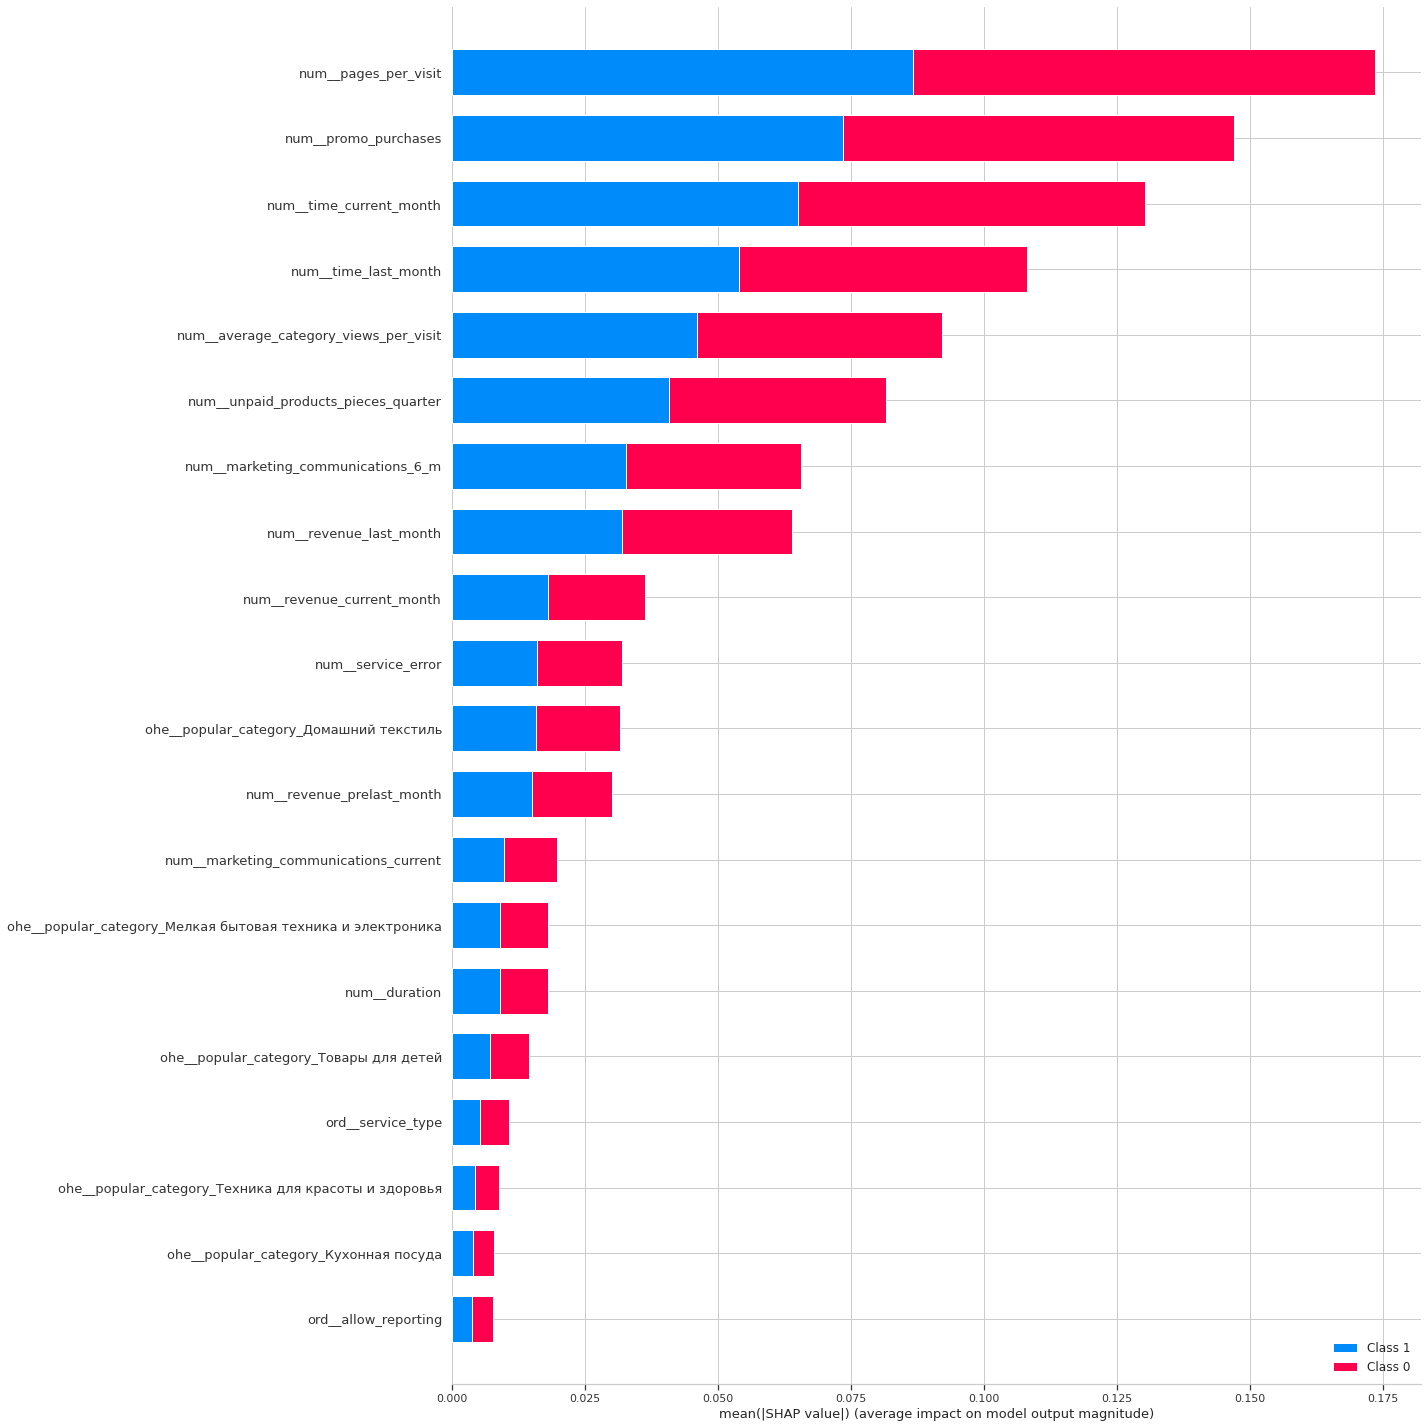

In [45]:
# Извлечение имён признаков
preprocessor = best_model.named_steps['preprocessor']
feature_names = preprocessor.get_feature_names_out()

# Построение графика SHAP с указанием имён признаков
shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names, plot_size=(20, 20))

По результатам графика SHAP, который иллюстрирует важность признаков для предсказания классов, можно сделать следующие выводы:
- Наибольшее влияние на предсказания оказывает поведение пользователей, связанное с посещениями страниц, количеством акционных покупок и активностью в текущем и прошлом месяцах.
- Признаки, связанные с конкретными категориями товаров, маркетинговыми коммуникациями и ошибками сервиса, оказывают меньшее влияние.
- Это наблюдение можно использовать для фокусировки на поведении клиентов в рамках веб-сессий и использования промоакций при принятии решений о дальнейших маркетинговых стратегиях.

  
    
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



- есть график важности факторов, график аккуратный
    
    
- есть выводы о том, какие факторы сильнее/слабее влияют
    
	
  
    
<div class="alert alert-warning">


Совет 🤔:
   
 
     
 

- рекомендую использовать  .beeswarm, чтобы можно посмотреть какая именно связь между факторами и таргетом (Положительая или отрицательная). это и для сегментирования даст дополнительную информацию
           
	
- можно и по-другому оценить важность признаков, это можно сделать с помощью [.feature_importance](https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html) (но не забываем что в логистической регрессии надо учесть логарифм в функция ошибки). Или с помощью [Permutation Importance](https://scikit-learn.org/stable/modules/permutation_importance.html) Если сделать, то должно получиться что-то похожее	
	
	 



## **Сегментация покупателей**

In [46]:
# data = data.set_index('id')
# Set 'id' as index in money DataFrame
# money = money.set_index('id')

# Check the indices and columns
print("Data Index:", data.index)
print("Money Index:", money.index)
print("Data Columns:", data.columns)
print("Money Columns:", money.columns)

# Perform the merge
data = pd.merge(data, money[['profit']], left_index=True, right_index=True, how='left')

# Check the result
display(data.head())
display(data.columns)

Data Index: Int64Index([215349, 215350, 215351, 215352, 215353, 215354, 215355, 215356,
            215358, 215360,
            ...
            216638, 216639, 216640, 216641, 216642, 216643, 216644, 216645,
            216646, 216647],
           dtype='int64', name='id', length=1296)
Money Index: RangeIndex(start=0, stop=1300, step=1)
Data Columns: Index(['activity', 'service_type', 'allow_reporting',
       'marketing_communications_6_m', 'marketing_communications_current',
       'duration', 'promo_purchases', 'popular_category',
       'average_category_views_per_visit', 'unpaid_products_pieces_quarter',
       'service_error', 'pages_per_visit', 'revenue_current_month',
       'revenue_last_month', 'revenue_prelast_month', 'time_current_month',
       'time_last_month'],
      dtype='object')
Money Columns: Index(['id', 'profit'], dtype='object')


,activity,service_type,allow_reporting,marketing_communications_6_m,marketing_communications_current,duration,promo_purchases,popular_category,average_category_views_per_visit,unpaid_products_pieces_quarter,service_error,pages_per_visit,revenue_current_month,revenue_last_month,revenue_prelast_month,time_current_month,time_last_month,profit
id,,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,NaN
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,NaN
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,NaN
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,NaN
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,NaN


Index(['activity', 'service_type', 'allow_reporting',
       'marketing_communications_6_m', 'marketing_communications_current',
       'duration', 'promo_purchases', 'popular_category',
       'average_category_views_per_visit', 'unpaid_products_pieces_quarter',
       'service_error', 'pages_per_visit', 'revenue_current_month',
       'revenue_last_month', 'revenue_prelast_month', 'time_current_month',
       'time_last_month', 'profit'],
      dtype='object')

In [47]:
print(money.columns)
print(money.index.name)


Index(['id', 'profit'], dtype='object')
None


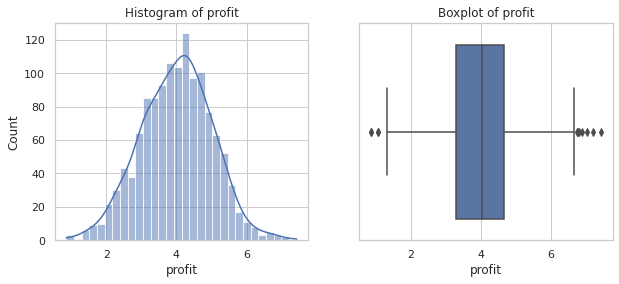

count    1296.000000
mean        3.997701
std         1.011198
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: profit, dtype: float64


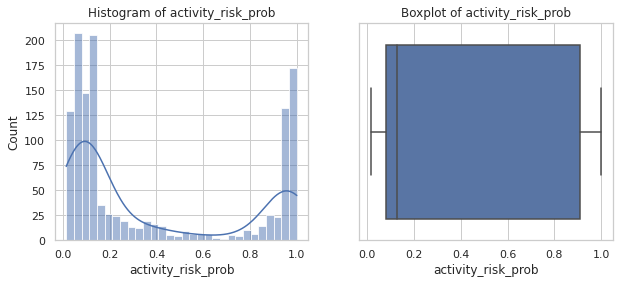

count    1296.000000
mean        0.382277
std         0.384936
min         0.014078
25%         0.078302
50%         0.126687
75%         0.907984
max         0.999994
Name: activity_risk_prob, dtype: float64


In [49]:
# Добавление столбца 'profit' в DataFrame 'data'
money = money.set_index('id')
data = pd.merge(data, money[['profit']], left_index=True, right_index=True, how='left')

# Прогнозировать вероятности для всего набора данных
data['activity_risk_prob'] = best_model.predict_proba(data.drop(['activity'], axis=1))[:, 1]

# Распределения признаков 'profit' и 'activity_risk_prob'
graph_numeric(data, 'profit')
graph_numeric(data, 'activity_risk_prob')

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:


всё-таки нигде   не увидел проверку что вероятность снизилась это 
    
    
    .predict_proba[:, 1]



Распределение признака 'profit' (Прибыль) близка к нормальному, большая часть значений прибыли находится в диапазоне от 3 до 5, с пиком около 4. Ящик с усами показывает медиану (около 4), границы первого и третьего квартилей (между 3 и 5), а также наличие нескольких выбросов (значений ниже 2 и выше 6). 

Распределение признака 'activity_risk_prob' (Риск снижения активности) имеет два явных пика — одно около 0 и второе около 1, что говорит о том, что большинство клиентов либо имеют низкий, либо высокий риск снижения активности. Наблюдается U-образная форма распределения.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


    Распределение признака 'activity_risk_prob' (Риск снижения активности) имеет два явных пика — одно около 0 и второе около 1, что говорит о том, что большинство клиентов либо имеют низкий, либо высокий риск снижения активности. Наблюдается U-образная форма распределения 
    
    
Я бы сказал что модель уверена своим в своих прогнозах. Всё-таки мы говорим о прогнозах а не о реальности    

In [50]:
# Определение пороговов высокой прибыли и высокого риска
profit_threshold = data['profit'].quantile(0.75)
risk_threshold = 0.7

# Сегмент с высоким риском
high_profit_high_risk = data[(data['profit'] >= profit_threshold) & (data['activity_risk_prob'] >= risk_threshold)]

# Сегмент с низким риском
high_profit_low_risk = data[(data['profit'] >= profit_threshold) & (data['activity_risk_prob'] < risk_threshold)]

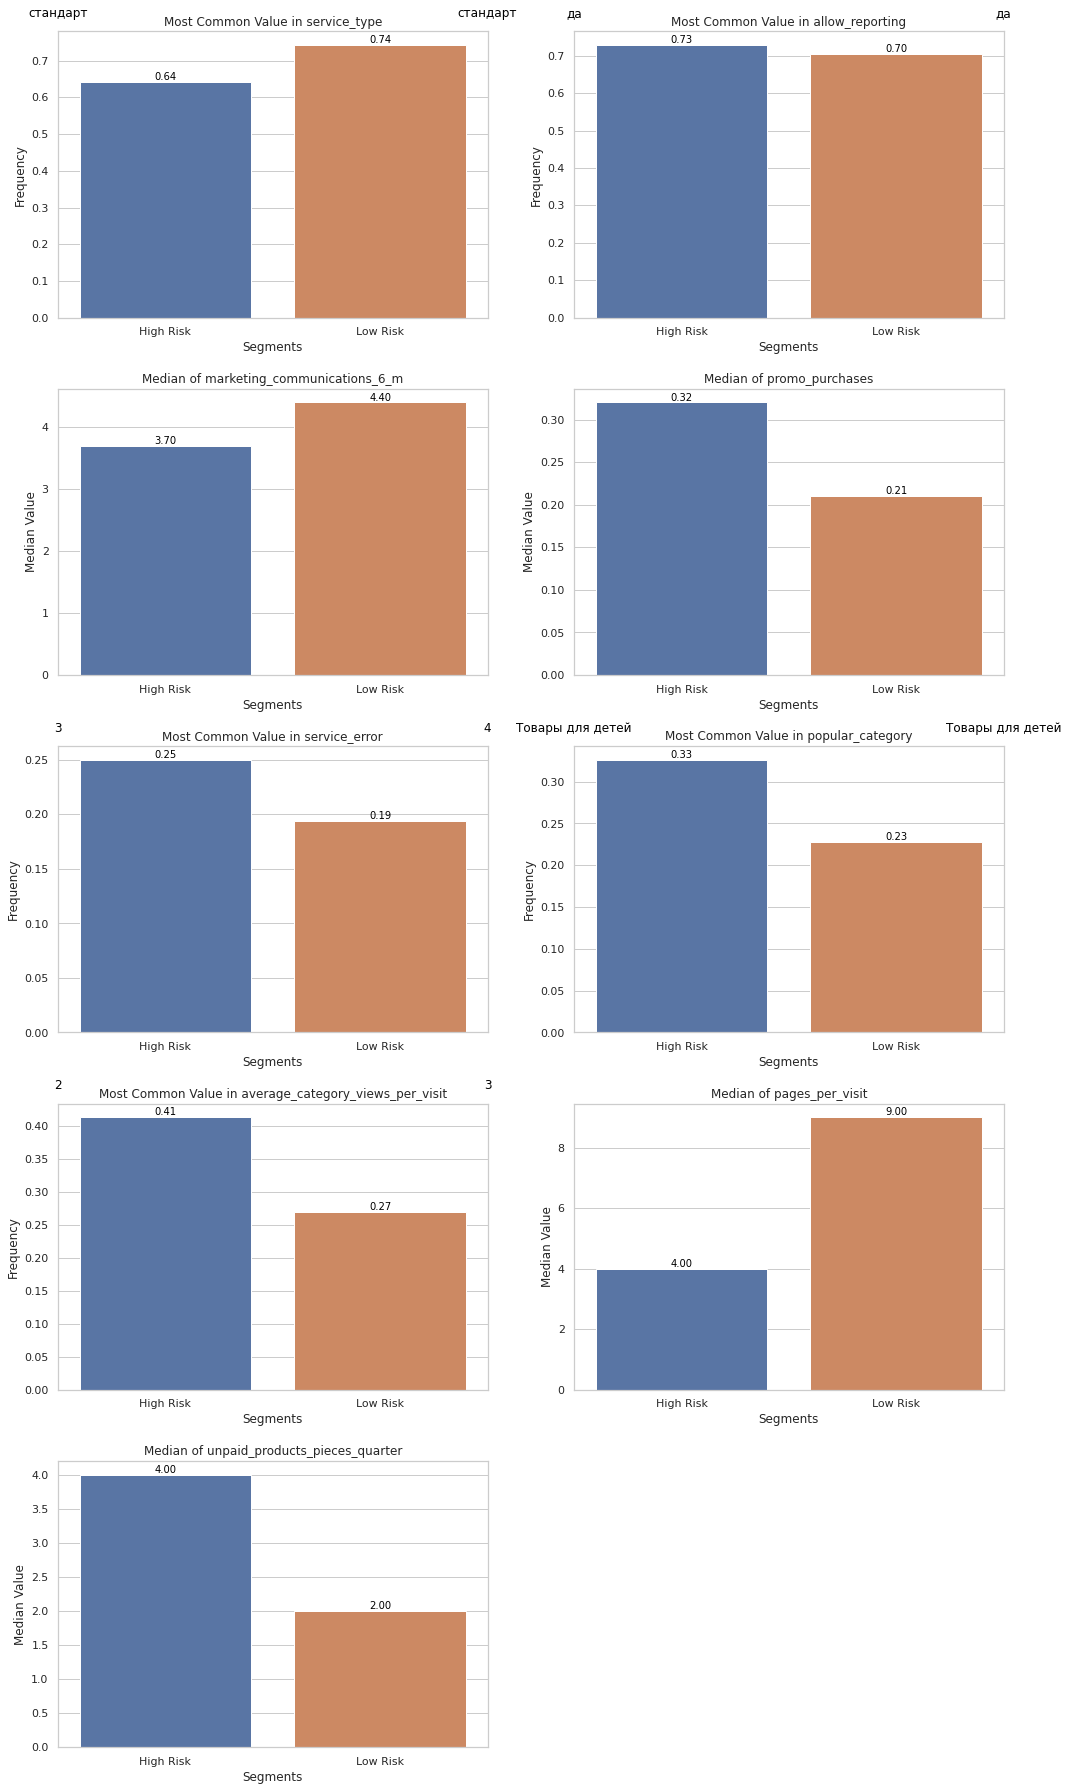

In [51]:
# Сравнение характеристик двух сегментов
features_to_compare = ['service_type', 'allow_reporting', 'marketing_communications_6_m', 'promo_purchases', 
                       'service_error', 'popular_category', 'average_category_views_per_visit', 'pages_per_visit', 
                       'unpaid_products_pieces_quarter']

# Количество признаков для сравнения
num_features = len(features_to_compare)

# Создание подграфиков с двумя столбцами
fig, axes = plt.subplots(nrows=(num_features // 2 + num_features % 2), ncols=2, figsize=(15, 5 * (num_features // 2 + num_features % 2)))
axes = axes.flatten()  # Превращаем в плоский список для удобства доступа

# Перебор всех признаков для сравнения
for idx, feature in enumerate(features_to_compare):
    ax = axes[idx]

    # Проверка типа признака
    if high_profit_high_risk[feature].dtype == 'object' or high_profit_high_risk[feature].nunique() < 10:
        # Категориальный признак: сравним самые популярные значения в двух сегментах
        
        # Найдем самое популярное значение в каждом сегменте
        top_value_high_profit_high_risk = high_profit_high_risk[feature].mode()[0]
        top_value_high_profit_low_risk = high_profit_low_risk[feature].mode()[0]
        
        # Построим bar plot для частоты самого популярного значения
        sns.barplot(
            x=['High Risk', 'Low Risk'],
            y=[(high_profit_high_risk[feature] == top_value_high_profit_high_risk).mean(),
               (high_profit_low_risk[feature] == top_value_high_profit_low_risk).mean()],
            ax=ax
        )
        ax.set_title(f'Most Common Value in {feature}')
        ax.set_ylabel('Frequency')
        ax.set_xlabel('Segments')

        # Добавление подписей на столбцы
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center', va='bottom', fontsize=10, color='black')

        # Добавление названия самого популярного значения над столбцами
        ax.annotate(f'{top_value_high_profit_high_risk}', xy=(0, 1.05), xycoords='axes fraction', ha='center', fontsize=12, color='black')
        ax.annotate(f'{top_value_high_profit_low_risk}', xy=(1, 1.05), xycoords='axes fraction', ha='center', fontsize=12, color='black')

    else:
        # Числовой признак: сравним медиану значений в двух сегментах
        
        # Найдем медианные значения в каждом сегменте
        median_high_profit_high_risk = high_profit_high_risk[feature].median()
        median_high_profit_low_risk = high_profit_low_risk[feature].median()

        # Построим bar plot для медианных значений
        sns.barplot(
            x=['High Risk', 'Low Risk'],
            y=[median_high_profit_high_risk, median_high_profit_low_risk],
            ax=ax
        )
        ax.set_title(f'Median of {feature}')
        ax.set_ylabel('Median Value')
        ax.set_xlabel('Segments')

        # Добавление подписей на столбцы
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center', va='bottom', fontsize=10, color='black')

# Удаление пустых подграфиков, если количество признаков нечетное
if num_features % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

**Сравнение признаков между сегментами `high_profit_high_risk` и `high_profit_low_risk`**:

**Service Type (Тип сервиса)**:
амое популярное значение для обоих сегментов — это "стандарт". Однако, в сегменте с низким риском (`Low Risk`) это значение встречается чаще (75%) по сравнению с сегментом с высоким риском (`High Risk`) — 62%. Сегменты относительно схожи по типу сервиса, однако клиенты с низким риском чаще выбирают стандартный тип сервиса. Возможно, стоит обратить внимание на дополнительные услуги для клиентов с высоким риском.

**Allow Reporting (Разрешить сообщать)**
Самое популярное значение в обоих сегментах — "да", при этом частота встречаемости почти одинакова (73% в сегменте с высоким риском и 71% в сегменте с низким риском). Этот признак не отличается существенно между сегментами, и здесь нет необходимости в изменениях.

**Marketing Communications in 6 months (среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев)**
Медиана маркетинговых коммуникаций выше в сегменте с низким риском (`Low Risk`) — 4 по сравнению с 3.6 у сегмента с высоким риском. Клиенты с низким риском более активно вовлечены в маркетинговые кампании. Увеличение частоты коммуникаций с клиентами с высоким риском может способствовать снижению их вероятности снижения активности.

**Promo Purchases (Акционные покупки)**
Медиана промо-покупок выше в сегменте с высоким риском (0.32) по сравнению с сегментом с низким риском (0.21). Клиенты с высоким риском чаще участвуют в промоакциях. Это может говорить о том, что их удержание через скидки и акции работает, но требуется больше усилий для долгосрочного удержания, возможно через более персонифицированные предложения.

**Service Error (Ошибки сервиса)**
Самое популярное значение в сегменте с высоким риском — 3 ошибки, в сегменте с низким риском — 4 ошибки. Однако разница в частотах минимальная (0.24 против 0.20). Ошибки сервиса могут быть фактором риска, и уменьшение количества ошибок для клиентов с высоким риском может снизить вероятность их оттока.

**Popular Category (Популярная категория покупок)**
Самое популярное значение в обоих сегментах — "Товары для детей", но в сегменте с высоким риском это значение встречается чаще (0.32 против 0.23). Клиенты с высоким риском чаще покупают товары для детей. Возможно, стоит рассмотреть дополнительные акции или программы лояльности, направленные на удержание этих клиентов.

**Average Category Views per Visit (Среднее количество просмотров категорий за визит)**
Самое популярное значение в сегменте с высоким риском — 2 просмотра (0.43), в то время как в сегменте с низким риском это значение составляет 3 просмотра (0.26). Клиенты с низким риском проводят больше времени на сайте и просматривают больше категорий. Для клиентов с высоким риском можно улучшить UX/UI для увеличения вовлеченности.

**Pages per Visit (Страниц за визит)**
Медиана количества страниц за визит в сегменте с низким риском значительно выше (9 страниц), по сравнению с 4 страницами в сегменте с высоким риском. Клиенты с низким риском больше взаимодействуют с сайтом. Это может свидетельствовать о большей вовлеченности. Улучшение навигации и персонализация могут способствовать увеличению вовлеченности клиентов с высоким риском.

**Unpaid Products Pieces per Quarter (Количество неоплаченных товаров за квартал)**
Медиана неоплаченных товаров за квартал выше в сегменте с высоким риском (4 товара), по сравнению с 2 товарами у клиентов с низким риском. Это может говорить о проблемах с заказами или оплатой у клиентов с высоким риском. Улучшение поддержки клиентов и автоматизация процесса оплаты могут помочь сократить этот показатель.

**Рекомендации для снижения риска в сегменте `high_profit_high_risk`**

1. **Увеличить частоту маркетинговых коммуникаций**: Клиенты с низким риском более вовлечены в маркетинговые кампании. Усиление взаимодействия с клиентами через персонализированные предложения, программы лояльности и промоакции может повысить их вовлеченность.
   
2. **Сократить количество ошибок сервиса**: Обратить внимание на улучшение качества обслуживания клиентов, так как наличие ошибок может значительно увеличивать риск снижения активности.
   
3. **Повысить вовлеченность на сайте**: Клиенты с низким риском чаще просматривают больше страниц и категорий. Улучшение интерфейса сайта, рекомендационных систем и персонификация могут увеличить вовлеченность клиентов с высоким риском.

4. **Облегчить процесс оплаты**: Проблемы с неоплаченными товарами могут свидетельствовать о сложности процесса оплаты. Улучшение платежной системы и внедрение автоматизированных напоминаний может снизить этот риск.

5. **Запустить специализированные предложения для сегмента**: Поскольку клиенты с высоким риском чаще покупают определённые категории товаров (например, "Товары для детей"), можно предложить больше акций и программ лояльности для этих категорий товаров, чтобы увеличить их удержание.


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Выбрал хороший сегмент и контрсегмент,  использовал метод сравнения,  дал разумные маркетинговые предложения 

 
     

<div class="alert alert-warning">


Совет 🤔:

 

- еще можно посмотреть на динамику выручки по месяцам, в группировке по категориальным признакам (популярная категория Товаров), возможно тут получится увидеть что то интересное и сделать какие то маркетинговые предложения. Отслеживание динамики, как и сравнение, отличный способ найти в данных что то интересное. Если посмотреть на выручки за разные месяцы в группировке по популярным товарам, то можно увидеть выручка по одной группе товаров сильно проседает

 

## **Общий вывод**

В ходе исследования данных пользователей интернет-магазин «В один клик», были выполнены следующие этапы:

**Исходные данные и предобработка**:
- Данные содержали информацию о поведении клиентов, таких как количество просмотренных страниц за визит, число промо-покупок, маркетинговые коммуникации, количество ошибок сервиса и многое другое.
- Были проведены стандартные этапы предобработки данных:
    - Привидение наименований признаков в единый формат
    - Работа с типами данных
    - Проверка пропусков и дубликатов.

Также был проведен корреляционный анализ для выявления мультиколлинеарных признаков, и на основе этого анализа были сделаны рекомендации по устранению мультиколлинеарности, например, с помощью регуляризации.

**Поиск лучшей модели**:
- Для поиска наилучшей модели была протестирована комбинация различных моделей машинного обучения с использованием пайплайна, включающего предобработку данных и обучение моделей.
- Лучшей моделью стала SVC с гиперпараметром C=1, что позволило достичь точности на тренировочной выборке 0.912 и на тестовой выборке 0.913.
- Для оценки влияния признаков на предсказания модели был использован метод SHAP, который показал, что наибольшее влияние на модель оказали такие признаки, как количество времени, проведённого на сайте в текущем месяце, число просмотренных страниц за визит и количество промо-покупок.

**Выделение сегмента покупателей**:
- Был проведён анализ клиентов с высокой прибылью, которые разделены на группы с высоким и низким риском снижения активности.
- Были выявлены ключевые различия между этими группами, такие как:
    - Клиенты с низким риском чаще вовлекаются в маркетинговые коммуникации и больше взаимодействуют с сайтом (больше просмотров страниц и категорий).
    - Клиенты с высоким риском чаще совершают акционные покупки и сталкиваются с ошибками сервиса.

**Рекомендации для сегмента**:
- Увеличение маркетинговых коммуникаций: Усиление взаимодействия с клиентами через персонализированные предложения и программы лояльности может увеличить вовлеченность клиентов с высоким риском.
- Снижение количества ошибок сервиса: Улучшение качества обслуживания и снижение числа ошибок может помочь удержать клиентов.
- Повышение вовлеченности на сайте: Усовершенствование интерфейса и рекомендации товаров помогут увеличить количество страниц и категорий, которые просматривают клиенты.
- Оптимизация процесса оплаты: Упрощение процесса оплаты и внедрение автоматизированных напоминаний может уменьшить число неоплаченных товаров и снизить риск потери клиентов.


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>



Baxtiyor, у тебя старательно выполненная работа, все четко, осмысленно.  



Выводы подробные, в конце разделов есть промежуточные выводы. 

Данный проект не только про моделирование, а даже больше про анализ.  Тут конечно надо было проявить логику и показать рассуждение в разделе сегментация, что тебе вполне удалось.

Графики аккуратные, здорово Что используешь seaborn, subplots

    
Я оставил небольшие советы желтым, по желанию можешь воспользоваться, в частности:

 
    
- после того как проверяем насколько корректно прочитались наши данные, можно сразу внести соответствующие изменения в read_csv        
    
    
- хорошо бы матрицы корреляций и графики построить  в разбивке по таргету, это хороший подход если мы хотим увидеть что то дополнительно
    	
    
 
- закодировать "снизилась" единичкой  (это может уберечь от дальнейшей путаницы). Это можно сделать вручную, или с помощью LabelEncoder
    
	
- для market_money, market_time   стоит построить графики с учетом группировки по "период" 


- наверное самый информативный график shap это   .beeswarm, ведь нам интересно оценить не только значимость, но и какая именно связь (прямая или обратная). Так что предлагаю построить и его  


- поменять формулировку .best_score_ 

    
  
    
    
Обязательное к исправлению:


 
- стоит показать проверку что .predict_proba()[:,1] это вероятность снизилась 
 

- неверно использована тестовая выборка

Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай ) 



<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Спасибо за работу!    

    
Красное исправлено, парочка желтые советы использованы (это все было по желанию), значит стремишься развиваться, а желание и интерес это главное. Надеюсь мои советы и вопросики были полезны и в копилочку знаний упало что то новое, а проект стал лучше, и симпатичней.

 
  
Отличная работа Baxtiyor. Желаю успехов в дальнейшей учебе!

 
</div>